# Scikit-Transformers : a simple example

## Preliminaries

In [15]:
# cd ../../../

/home/alex/tmp


/home/alex/tmp/scikit-transformer/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Imports 

In [16]:
import numpy as np


import pandas as pd

In [17]:
import seaborn as sns

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer

## Data

In [19]:
df = pd.read_csv(
    "https://gist.githubusercontent.com/AlexandreGazagnes/9018022652ba0933dd39c9df8a600292/raw/0845ef4c2df4806bb05c8c7423dc75d93e37400f/titanic_train_raw_csv"
)

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
y = df.Survived
X = df.iloc[:, 2:]

In [22]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
X = X.select_dtypes(exclude="object")
X

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


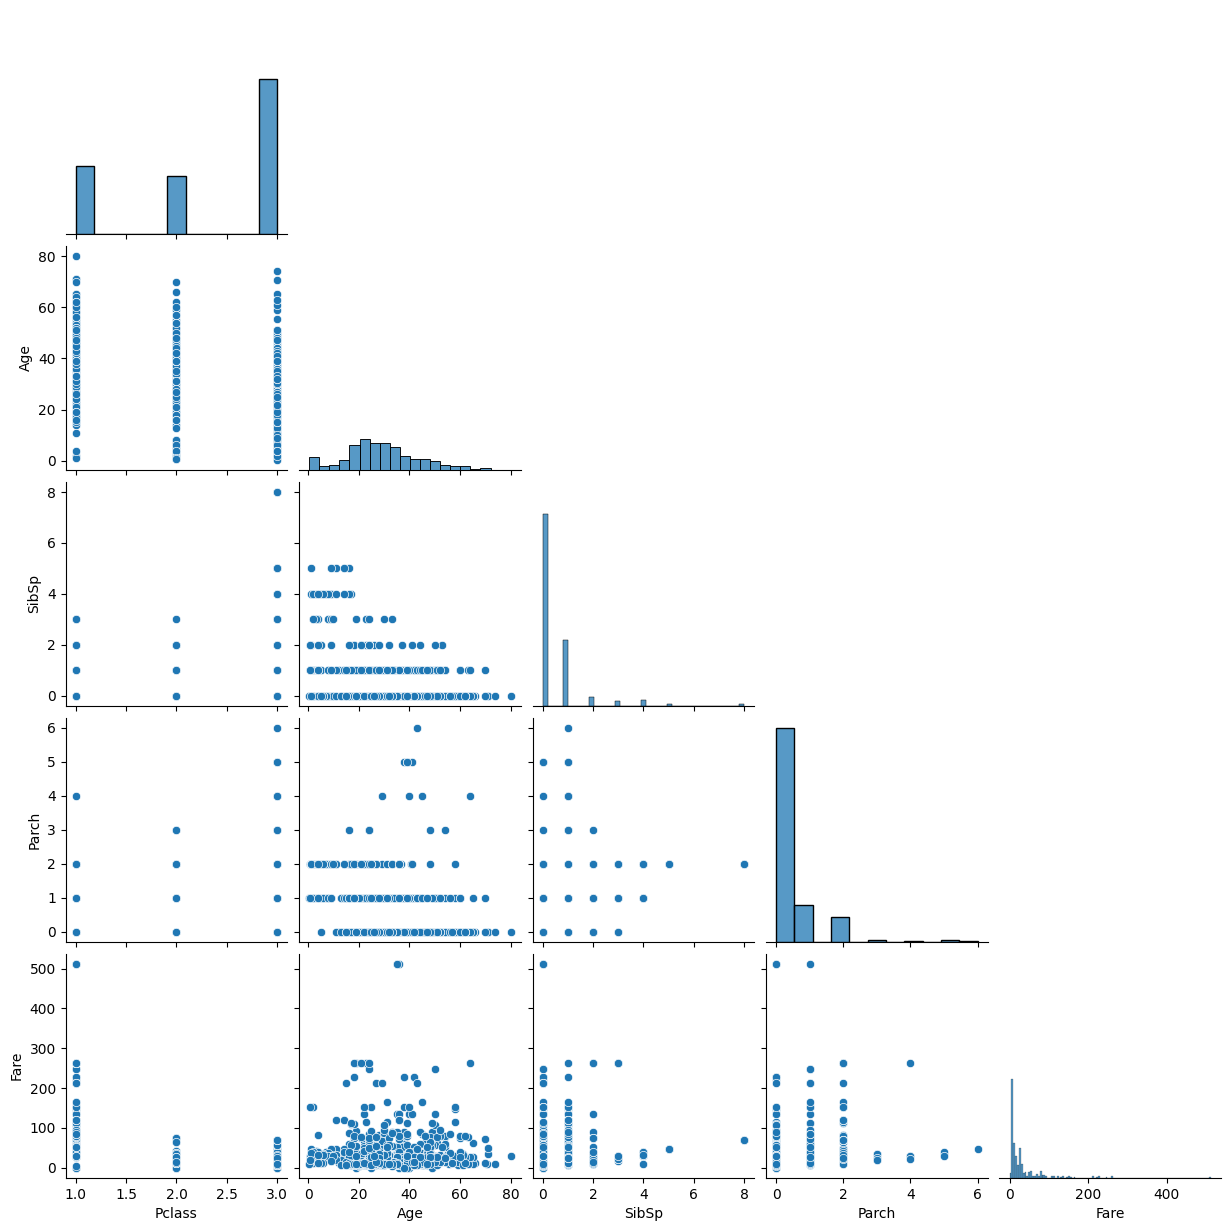

In [25]:
sns.pairplot(X, corner=True)

## Using the LogTransformer

In [26]:
#! pip install scikit-transformers

In [ ]:
from sktransf import LogColumnTransformer

In [27]:
__X = X.copy()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,0.693147,0,2.110213
1,1,38.0,0.693147,0,4.280593
2,3,26.0,0.000000,0,2.188856
3,1,35.0,0.693147,0,3.990834
4,3,35.0,0.000000,0,2.202765
...,...,...,...,...,...
886,2,27.0,0.000000,0,2.639057
887,1,19.0,0.000000,0,3.433987
888,3,NaN,0.693147,2,3.196630
889,1,26.0,0.000000,0,3.433987


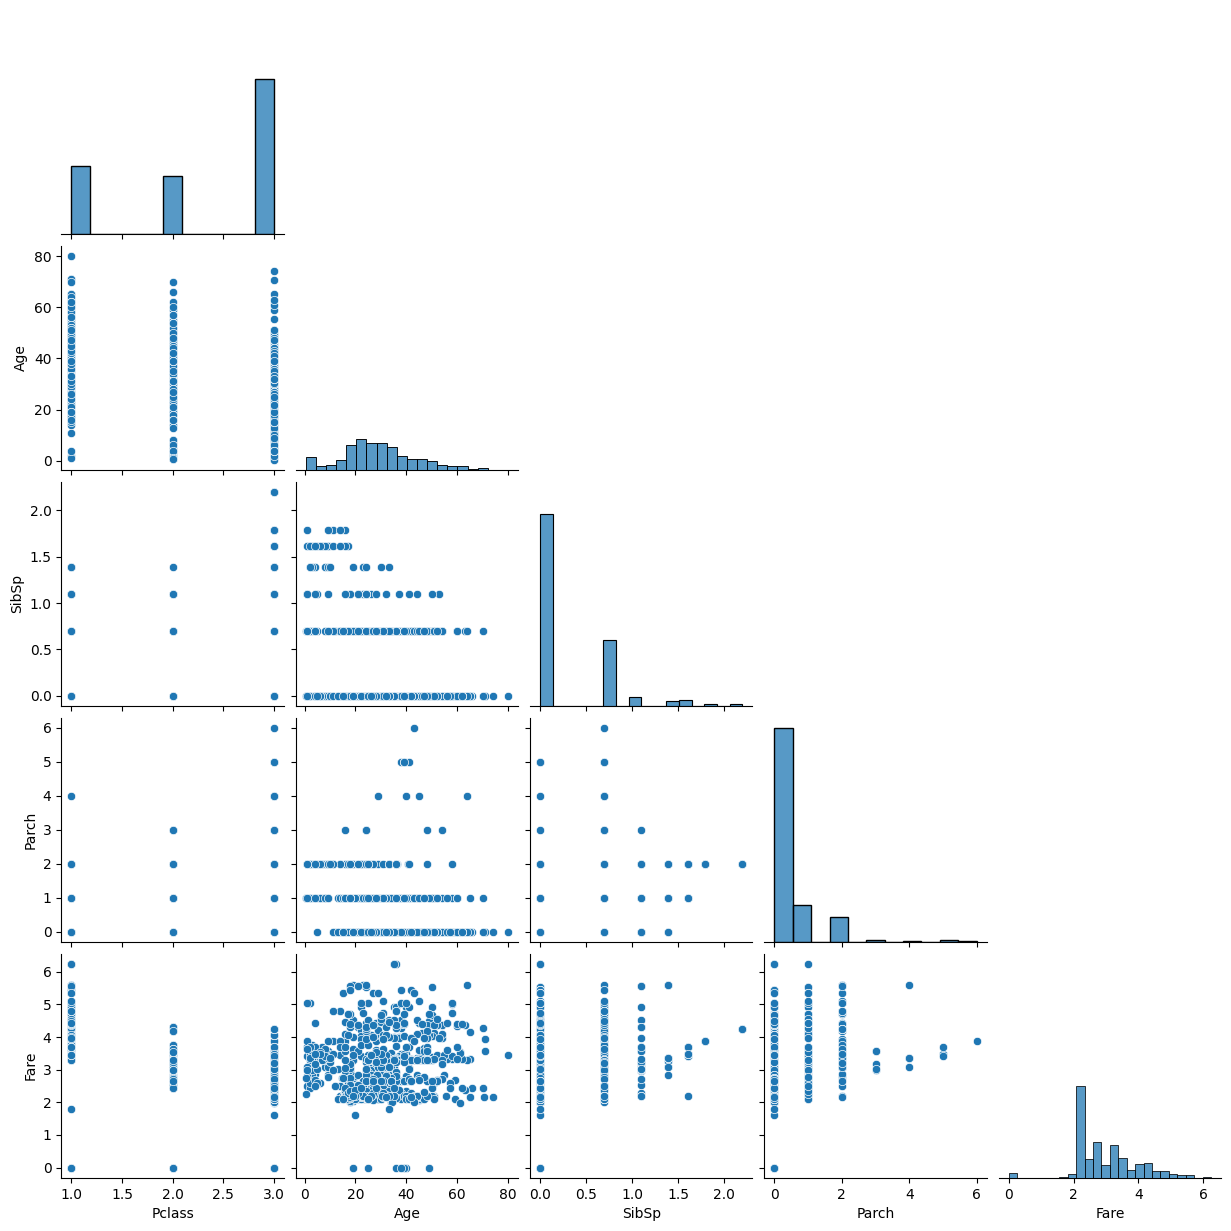

In [28]:
__X = X.copy()
__X = LogColumnTransformer(force_df_out=True).fit_transform(X)
display(__X)
sns.pairplot(__X, corner=True)

,Pclass,Age,SibSp,Parch,Fare
0,3,3.135494,0.693147,0.000000,2.110213
1,1,3.663562,0.693147,0.000000,4.280593
2,3,3.295837,0.000000,0.000000,2.188856
3,1,3.583519,0.693147,0.000000,3.990834
4,3,3.583519,0.000000,0.000000,2.202765
...,...,...,...,...,...
886,2,3.332205,0.000000,0.000000,2.639057
887,1,2.995732,0.000000,0.000000,3.433987
888,3,NaN,0.693147,1.098612,3.196630
889,1,3.295837,0.000000,0.000000,3.433987


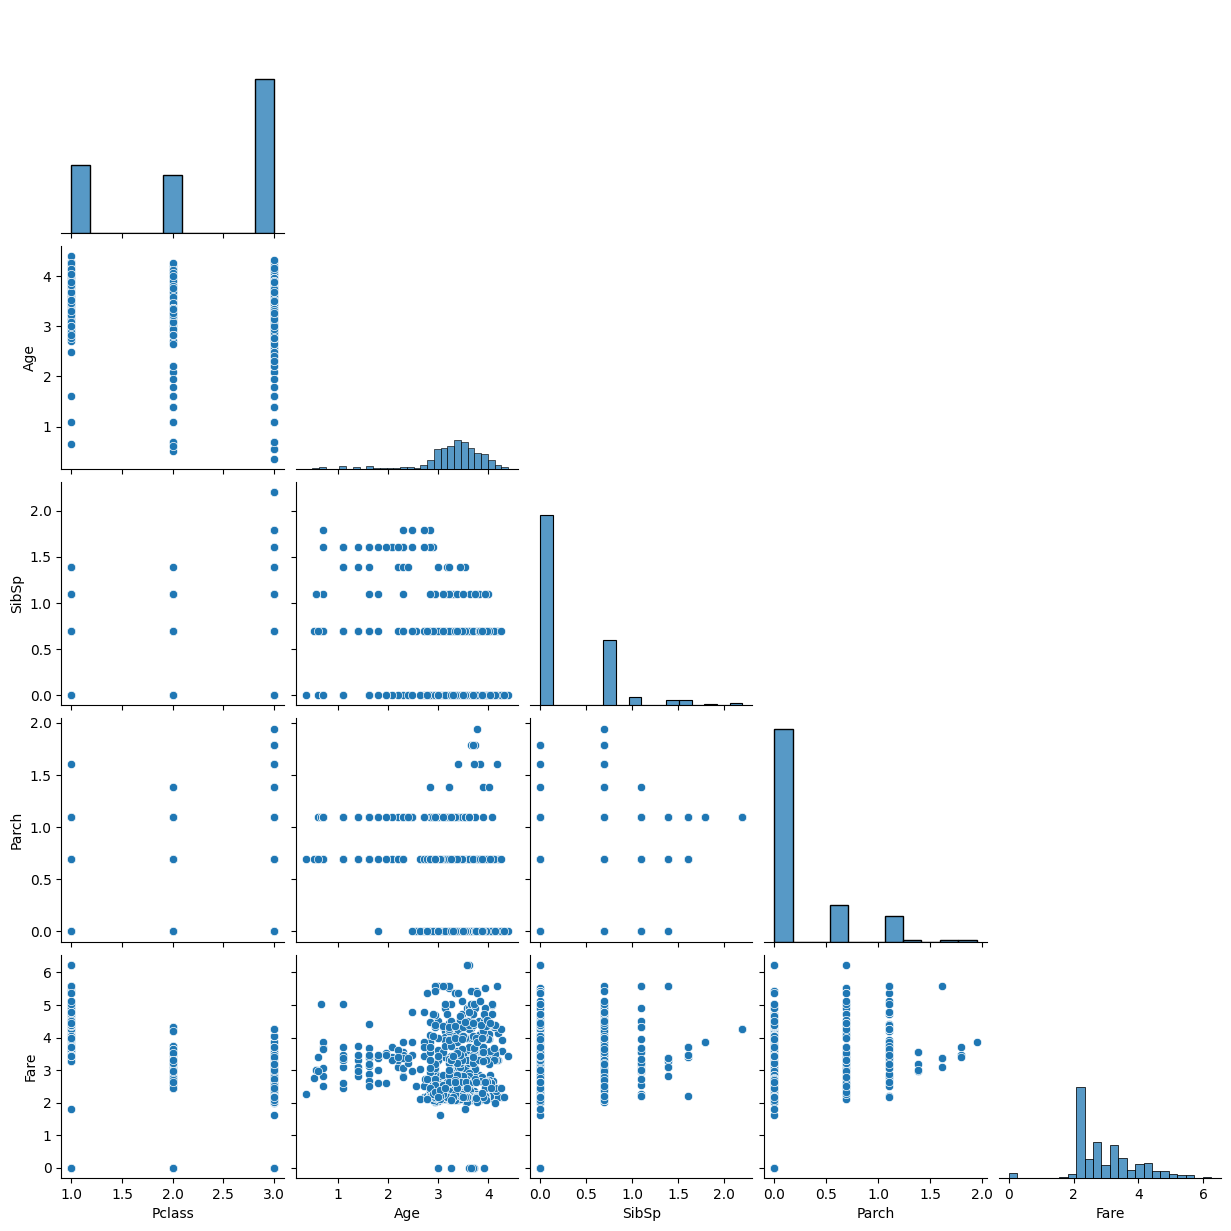

In [29]:
__X = X.copy()
__X = LogColumnTransformer(force_df_out=True, threshold=0).fit_transform(X)
display(__X)
sns.pairplot(__X, corner=True)

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


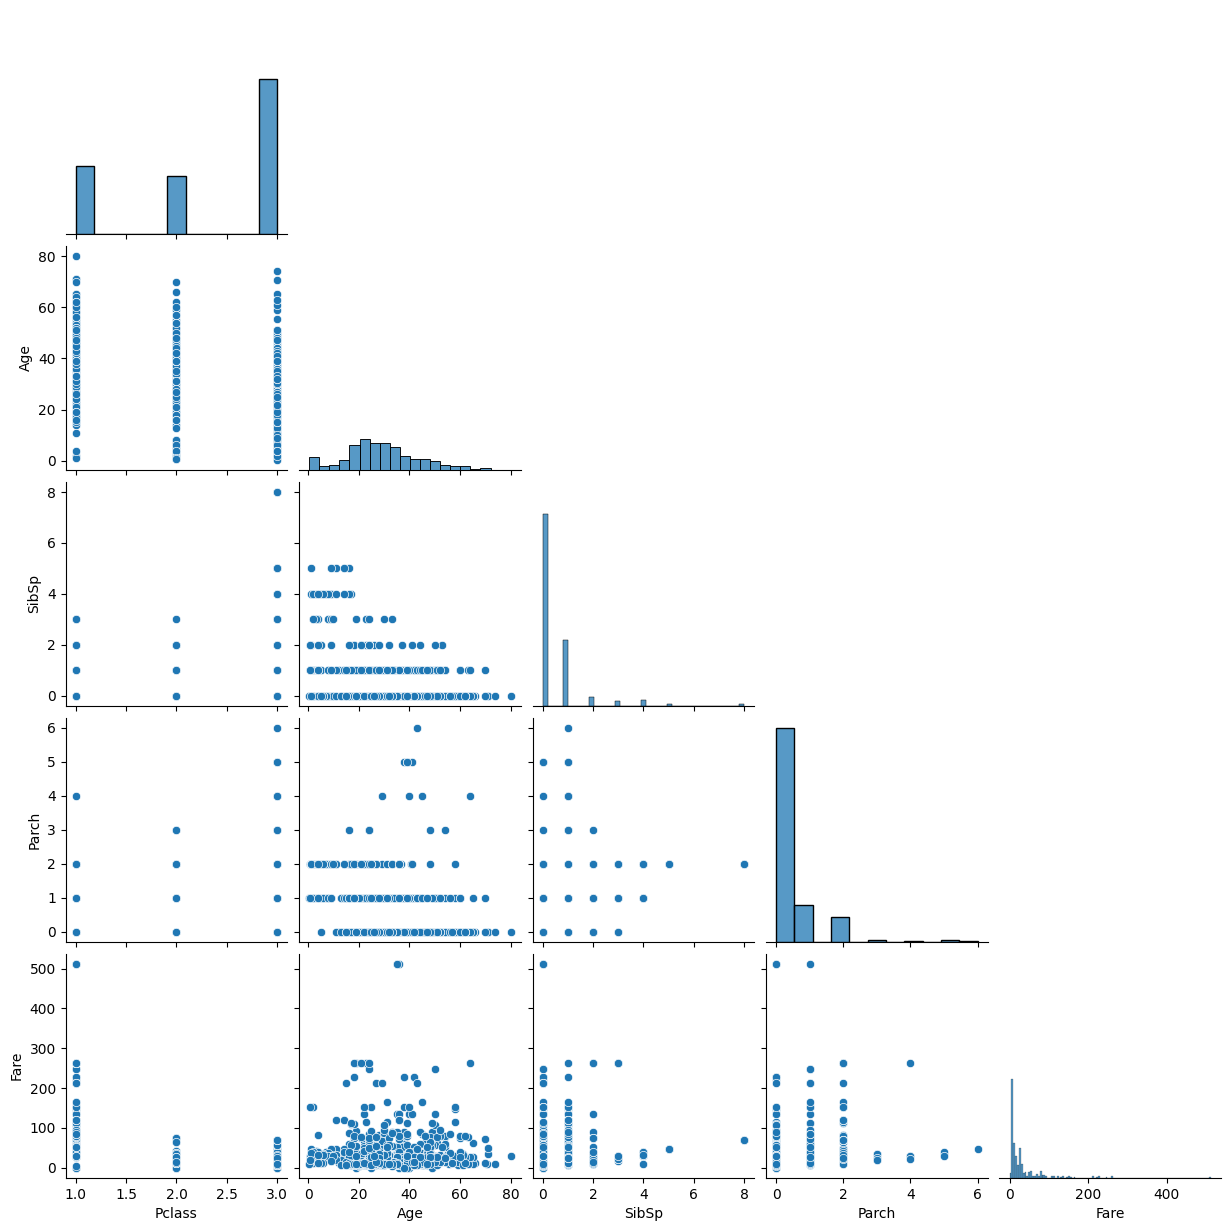

In [30]:
__X = X.copy()
__X = LogColumnTransformer(force_df_out=True, threshold=5).fit_transform(X)
display(__X)
sns.pairplot(__X, corner=True)

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,0.693147,0.000000,2.110213
1,1,38.0,0.693147,0.000000,4.280593
2,3,26.0,0.000000,0.000000,2.188856
3,1,35.0,0.693147,0.000000,3.990834
4,3,35.0,0.000000,0.000000,2.202765
...,...,...,...,...,...
886,2,27.0,0.000000,0.000000,2.639057
887,1,19.0,0.000000,0.000000,3.433987
888,3,NaN,0.693147,1.098612,3.196630
889,1,26.0,0.000000,0.000000,3.433987


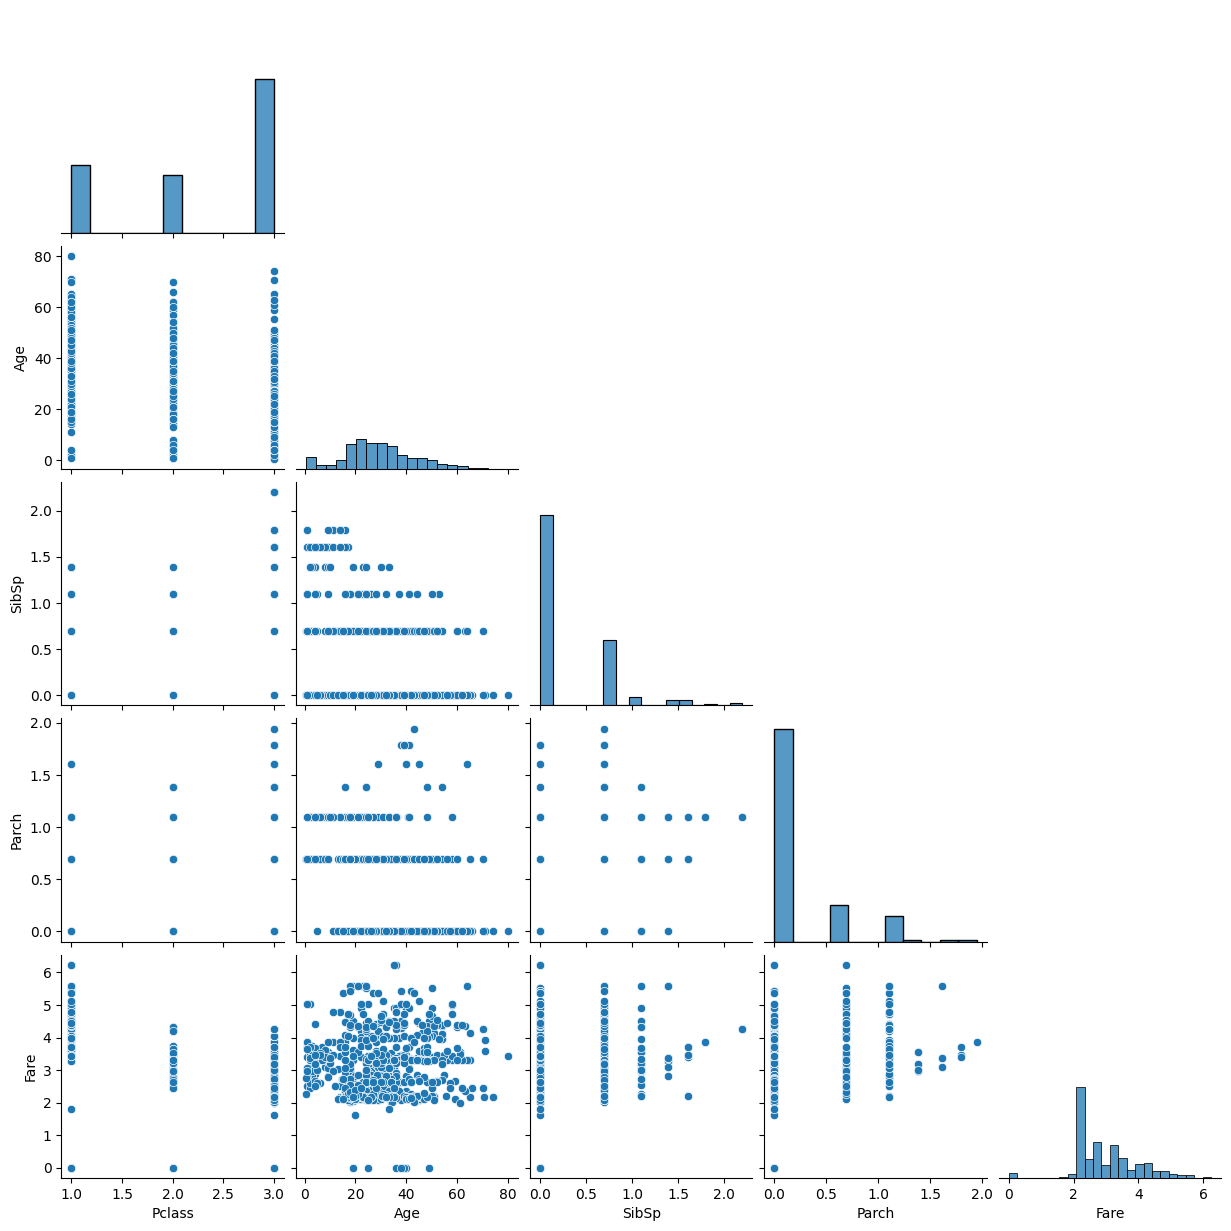

In [31]:
__X = X.copy()
__X = LogColumnTransformer(force_df_out=True, threshold=1.5).fit_transform(X)
display(__X)
sns.pairplot(__X, corner=True)

## Using an Scikit Learn Pipeline

In [32]:
pipeline = Pipeline(
    [
        ("imputer", KNNImputer()),
        ("logger", LogColumnTransformer()),
        ("scaler", StandardScaler()),
        ("estimator", RandomForestClassifier()),
    ]
)

In [33]:
param_grid = {
    "imputer__n_neighbors": [3, 5],
    "logger__threshold": [0.5, 1, 1.5, 3, 3.5],
    "scaler": [StandardScaler(), "passthrough"],
    "estimator__n_estimators": [100, 200, 300],
}

In [34]:
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    refit=True,
    return_train_score=True,
    n_jobs=-1,
    verbose=1,
)

In [35]:
X

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [36]:
grid.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('logger', LogTransformer()),
                                       ('scaler', StandardScaler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator__n_estimators': [100, 200, 300],
                         'imputer__n_neighbors': [3, 5],
                         'logger__threshold': [0.5, 1, 1.5, 3, 3.5],
                         'scaler': [StandardScaler(), 'passthrough']},
             return_train_score=True, verbose=1)

In [37]:
#!pip install scikit-res

In [38]:
from skres import SkRes

In [39]:
res = SkRes(grid)
res.head()

,mean_fit_time,mean_score_time,param_estimator__n_estimators,param_imputer__n_neighbors,param_logger__threshold,param_scaler,params,mean_test_score,std_test_score,mean_train_score,std_train_score
44,1.0347,0.0621,300,3,1.5,StandardScaler(),"{'estimator__n_estimators': 300, 'imputer__n_n...",0.6936,0.0210,0.9607,0.0025
25,0.7911,0.0546,200,3,1.5,passthrough,"{'estimator__n_estimators': 200, 'imputer__n_n...",0.6903,0.0141,0.9607,0.0025
23,0.7170,0.0433,200,3,1,passthrough,"{'estimator__n_estimators': 200, 'imputer__n_n...",0.6903,0.0259,0.9607,0.0025
24,0.7195,0.0414,200,3,1.5,StandardScaler(),"{'estimator__n_estimators': 200, 'imputer__n_n...",0.6891,0.0184,0.9607,0.0025
45,1.1154,0.0664,300,3,1.5,passthrough,"{'estimator__n_estimators': 300, 'imputer__n_n...",0.6891,0.0182,0.9607,0.0025
